In [3]:
!pip install opencv-python
# Making some essential imports as Usual
import os
import sys
import numpy as np
import re
import cv2 as op # Now import cv2 as op after installation
import matplotlib.pyplot as plt
!pip install tensorflow
import tensorflow as tf
from tqdm import tqdm
from os import listdir
import pandas as pd
from keras.layers import Dense, Dropout, Input, add, Conv2D, BatchNormalization, MaxPooling2D, Conv2DTranspose,Activation, Concatenate
from tensorflow import keras
from time import time
from tqdm import tqdm
from keras import backend as K

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 98.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.2 MB/s eta 0:00:00


In [7]:
!pip install albumentations > /dev/null
!pip install -U efficientnet==0.0.4
import numpy as np
import pandas as pd
import gc
import keras

import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn to set the style, which then updates matplotlib
sns.set_theme(style="white") # Use sns.set_theme() to set the seaborn style

#plt.style.use('seaborn-white') # This line is causing the error and is no longer needed.
#import seaborn as sns
#sns.set_style("white")

from sklearn.model_selection import train_test_split,StratifiedKFold

from skimage.transform import resize
import tensorflow as tf
import keras.backend as K
from keras.losses import binary_crossentropy

from keras.preprocessing.image import load_img
from keras import Model
from keras.callbacks import  ModelCheckpoint
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization
from tqdm import tqdm_notebook
from keras import initializers
from keras import regularizers
from keras import constraints
# from keras.utils import conv_utils
from keras.utils import get_file

from keras import backend as K
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.losses import binary_crossentropy
import keras.callbacks as callbacks
from keras.callbacks import Callback
from keras.applications.xception import Xception
from keras.layers import multiply

In [9]:
from keras.utils import get_file

In [10]:
%env SM_FRAMEWORK = tf.keras
!pip install segmentation_models
!pip install  albumentations

env: SM_FRAMEWORK=tf.keras
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: efficientnet
    Found existing installation: efficientnet 0.0.4
    Uninstalling efficientnet-0.0.4:
      Successfully uninstalled efficientnet-0.0.4


In [11]:
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

numpy==2.0.2
re==2.2.1
cv2==4.11.0
tensorflow==2.19.0
pandas==2.2.2
keras==3.8.0
seaborn==0.13.2


Path to dataset files: /root/.cache/kagglehub/datasets/balraj98/massachusetts-roads-dataset/versions/1
Dataset path: /root/.cache/kagglehub/datasets/balraj98/massachusetts-roads-dataset/versions/1
Files and folders: ['metadata.csv', 'tiff', 'label_class_dict.csv']
(1500, 1500, 3)


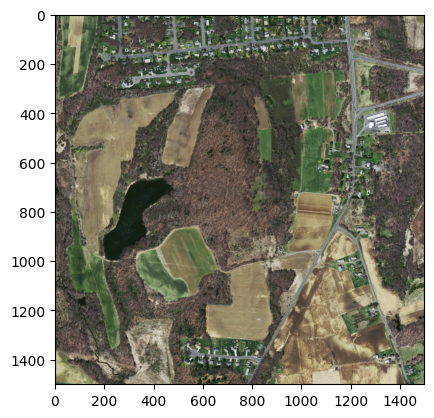

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("balraj98/massachusetts-roads-dataset")
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
print("Path to dataset files:", path)
print("Dataset path:", path)
print("Files and folders:", os.listdir(path))
img = plt.imread('/root/.cache/kagglehub/datasets/balraj98/massachusetts-roads-dataset/versions/1/tiff/train/10228675_15.tiff')
print(img.shape)

plt.imshow(img)

['24628810_15.tiff', '22379035_15.tiff', '22828900_15.tiff', '22229005_15.tiff', '21628870_15.tiff', '23579020_15.tiff', '10978660_15.tiff', '21479020_15.tiff', '23578510_15.tiff', '11278645_15.tiff', '23278960_15.tiff', '26128795_15.tiff', '18178825_15.tiff', '22528930_15.tiff', '17428915_15.tiff', '23579110_15.tiff', '23129050_15.tiff', '21479005_15.tiff', '15628855_15.tiff', '22529455_15.tiff', '10078750_15.tiff', '23128900_15.tiff', '20578990_15.tiff', '11278705_15.tiff', '23279005_15.tiff', '21928915_15.tiff', '22228945_15.tiff', '20279005_15.tiff', '26728735_15.tiff', '19978675_15.tiff', '12328720_15.tiff', '25679245_15.tiff', '22228960_15.tiff', '23729050_15.tiff', '21779050_15.tiff', '22679020_15.tiff', '23729080_15.tiff', '22529470_15.tiff', '15628930_15.tiff', '24028990_15.tiff', '16078915_15.tiff', '17128885_15.tiff', '21478915_15.tiff', '22228990_15.tiff', '11428840_15.tiff', '23578810_15.tiff', '17578750_15.tiff', '23279155_15.tiff', '11278780_15.tiff', '16078930_15.tiff',

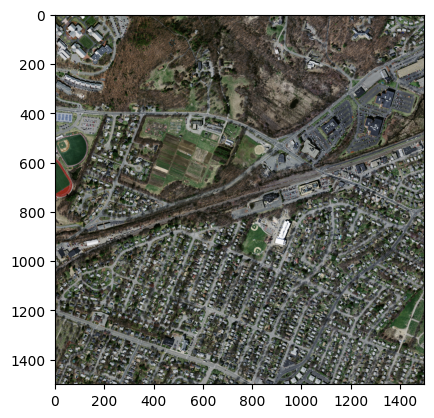

In [35]:
folder_path = '/root/.cache/kagglehub/datasets/balraj98/massachusetts-roads-dataset/versions/1/tiff/train'
print(os.listdir(folder_path))

img = plt.imread('/root/.cache/kagglehub/datasets/balraj98/massachusetts-roads-dataset/versions/1/tiff/train/22379035_15.tiff')
print(img.shape)
plt.imshow(img)


(1500, 1500)


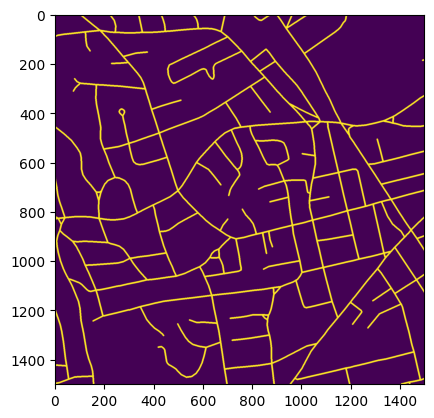

In [33]:
img = plt.imread('/root/.cache/kagglehub/datasets/balraj98/massachusetts-roads-dataset/versions/1/tiff/train_labels/23429170_15.tif')
print(img.shape)
plt.imshow(img)

In [27]:
folder_path = '/root/.cache/kagglehub/datasets/balraj98/massachusetts-roads-dataset/versions/1/tiff/train_labels'
print(os.listdir(folder_path))

['18028900_15.tif', '23429170_15.tif', '24629260_15.tif', '18478885_15.tif', '23878975_15.tif', '23428840_15.tif', '19078735_15.tif', '21628915_15.tif', '21629005_15.tif', '24028825_15.tif', '20578945_15.tif', '17578840_15.tif', '22679455_15.tif', '22079065_15.tif', '24479260_15.tif', '23129005_15.tif', '24629170_15.tif', '23278960_15.tif', '17878750_15.tif', '21328885_15.tif', '22078930_15.tif', '25979245_15.tif', '21478870_15.tif', '11428765_15.tif', '21928960_15.tif', '20878915_15.tif', '23279170_15.tif', '22679005_15.tif', '11278705_15.tif', '26728690_15.tif', '24328795_15.tif', '22678915_15.tif', '22979005_15.tif', '22679050_15.tif', '24479005_15.tif', '11278945_15.tif', '12628810_15.tif', '20728915_15.tif', '23878495_15.tif', '23129035_15.tif', '23879245_15.tif', '21328990_15.tif', '25229155_15.tif', '24329185_15.tif', '19978645_15.tif', '18328720_15.tif', '23429155_15.tif', '23578570_15.tif', '25079155_15.tif', '11728840_15.tif', '11128855_15.tif', '22979470_15.tif', '10828705_1

In [16]:
from os import listdir
def build_data(PATH):
    data = []
    filenames = sorted(listdir(PATH))
    for name in filenames:
        data.append(PATH + '/' + name)
    return data


TRAIN_PATH = '/root/.cache/kagglehub/datasets/balraj98/massachusetts-roads-dataset/versions/1/tiff/train'
LABEL_PATH = '/root/.cache/kagglehub/datasets/balraj98/massachusetts-roads-dataset/versions/1/tiff/train_labels'

sat_image = build_data(TRAIN_PATH)
mask_image = build_data(LABEL_PATH)

VAL_TRAIN_PATH = '/root/.cache/kagglehub/datasets/balraj98/massachusetts-roads-dataset/versions/1/tiff/val'
VAL_LABEL_PATH = '/root/.cache/kagglehub/datasets/balraj98/massachusetts-roads-dataset/versions/1/tiff/val_labels'

VAL_sat_image = build_data(VAL_TRAIN_PATH)
VAL_mask_image = build_data(VAL_LABEL_PATH)

In [17]:
TEST_PATH = '/root/.cache/kagglehub/datasets/balraj98/massachusetts-roads-dataset/versions/1/tiff/test'
TEST_LABEL_PATH = '/root/.cache/kagglehub/datasets/balraj98/massachusetts-roads-dataset/versions/1/tiff/test_labels'

TEST_sat_image = build_data(TEST_PATH)
TEST_mask_image = build_data(TEST_LABEL_PATH)

In [18]:
len(sat_image), len(mask_image), len(VAL_sat_image), len(VAL_mask_image ),len(TEST_sat_image), len(TEST_mask_image )

(1108, 1108, 14, 14, 49, 49)

In [19]:
df = pd.DataFrame({
    'Image' : sat_image,
    'Mask' : mask_image
})


val_df = pd.DataFrame({
    'Val_Image' : VAL_sat_image,
    'Val_Mask' : VAL_mask_image
})


test_df = pd.DataFrame({
    'Test_Image' : TEST_sat_image,
    'Test_Mask' : TEST_mask_image
})


import albumentations as A
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Blur(blur_limit = 5, p = 0.85),
#     A.RandomCrop(height = 512, width = 512, p = 1)
])

In [47]:
IMG_SIZE = (256, 256)

def modify_mask(mask):
    mask = np.expand_dims(mask, axis = 2)
    t_mask = np.zeros(mask.shape)
    np.place(t_mask[:, :, 0], mask[:, :, 0] >=100, 1)
    return t_mask

def map_function(img_path, mask_path):
    import cv2 # Import cv2 within the function

    # Use cv2.imread to read the images, which handles TIFF files better
    img = cv2.imread(img_path.decode('utf-8'), cv2.IMREAD_UNCHANGED)
    mask = cv2.imread(mask_path.decode('utf-8'), cv2.IMREAD_UNCHANGED)

    img = cv2.resize(img, IMG_SIZE) # Use cv2 instead of op
    mask = modify_mask(cv2.resize(mask, IMG_SIZE)) # Use cv2 instead of op

    img = img/255.0
    transformed = transform(image=img, mask=mask)
    img = transformed['image']
    mask = transformed['mask']

    #mask = modify_mask(mask)

    return img.astype(np.float64), mask.astype(np.float64)

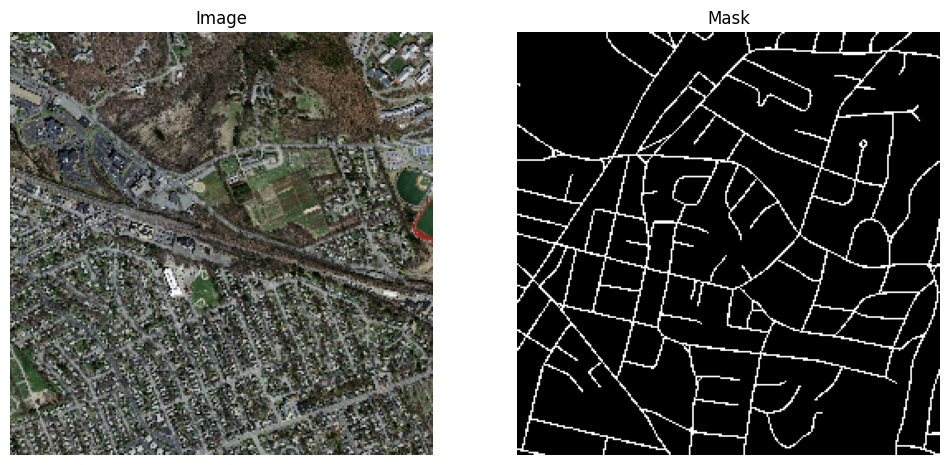

In [43]:
import matplotlib.pyplot as plt

# Assuming you have one sample image and mask file paths (replace with actual paths)
img_path = '/root/.cache/kagglehub/datasets/balraj98/massachusetts-roads-dataset/versions/1/tiff/train/22379035_15.tiff'  # Replace with your image path
mask_path = '/root/.cache/kagglehub/datasets/balraj98/massachusetts-roads-dataset/versions/1/tiff/train_labels/23429170_15.tif'  # Replace with your mask path

# Call map_function to process the image and mask
img, mask = map_function(img_path, mask_path)

# Plotting the image and the mask side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display image
ax[0].imshow(img)
ax[0].set_title('Image')
ax[0].axis('off')  # Hide axes

# Display mask
ax[1].imshow(mask[:, :, 0], cmap='gray')  # Display only the first channel (binary mask)
ax[1].set_title('Mask')
ax[1].axis('off')  # Hide axes

plt.show()


In [48]:
BATCH_SIZE = 16

def create_dataset(data):
    dataset = tf.data.Dataset.from_tensor_slices((data['Image'], data['Mask']))
    dataset = dataset.shuffle(1000)
    dataset = dataset.map(lambda img, mask : tf.numpy_function(
                    map_function, [img, mask], [tf.float64, tf.float64]),
                    num_parallel_calls = tf.data.experimental.AUTOTUNE).batch(BATCH_SIZE)

    dataset = dataset.prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
    return dataset


BATCH_SIZE = 16

def create_dataset1(data):
    dataset = tf.data.Dataset.from_tensor_slices((data['Val_Image'], data['Val_Mask']))
    dataset = dataset.shuffle(1000)
    dataset = dataset.map(lambda img, mask : tf.numpy_function(
                    map_function, [img, mask], [tf.float64, tf.float64]),
                    num_parallel_calls = tf.data.experimental.AUTOTUNE).batch(BATCH_SIZE)

    dataset = dataset.prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
    return dataset


BATCH_SIZE = 16

def create_dataset2(data):
    dataset = tf.data.Dataset.from_tensor_slices((data['Test_Image'], data['Test_Mask']))
    dataset = dataset.shuffle(1000)
    dataset = dataset.map(lambda img, mask : tf.numpy_function(
                    map_function, [img, mask], [tf.float64, tf.float64]),
                    num_parallel_calls = tf.data.experimental.AUTOTUNE).batch(BATCH_SIZE)

    dataset = dataset.prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
    return dataset

In [49]:
import tensorflow as tf
train_dataset = create_dataset(df)
img, mask = next(iter(train_dataset))
img.shape, mask.shape


val_dataset = create_dataset1(val_df)
val_img, val_mask = next(iter(val_dataset))
val_img.shape, val_mask.shape


test_dataset = create_dataset2(test_df)
test_img, test_mask = next(iter(test_dataset))
test_img.shape, test_mask.shape

(TensorShape([16, 256, 256, 3]), TensorShape([16, 256, 256, 1]))

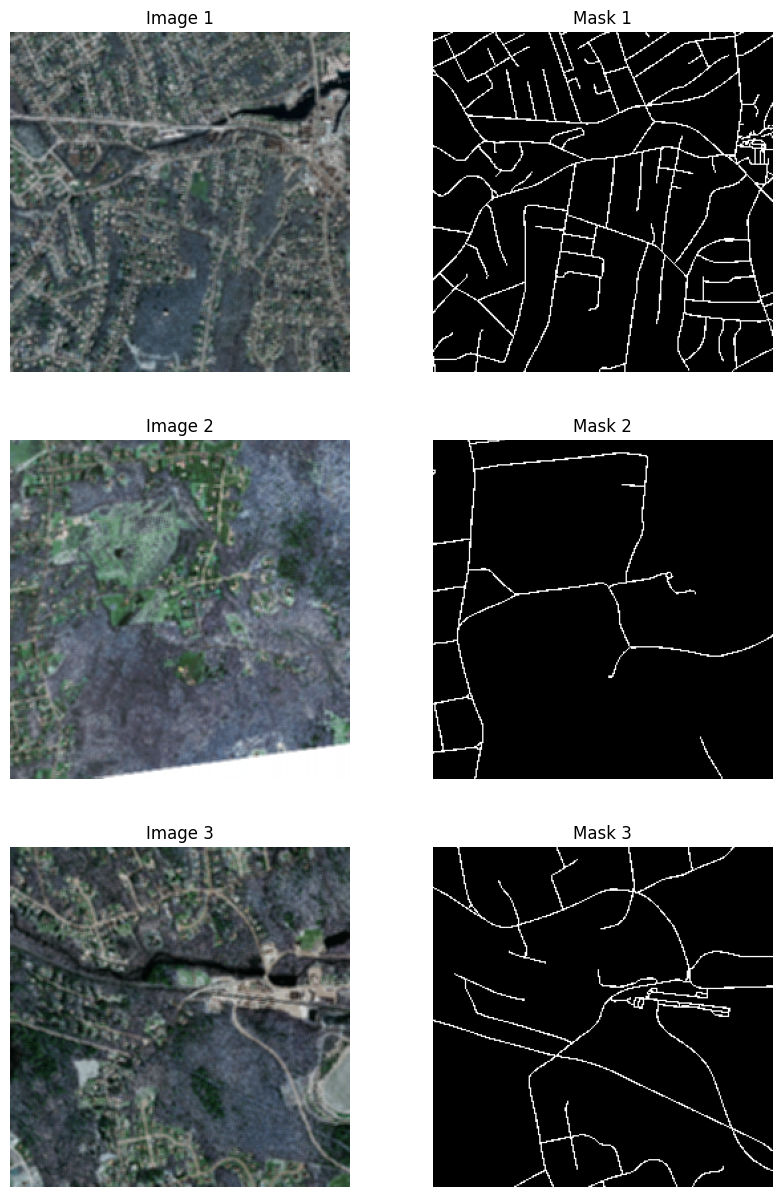

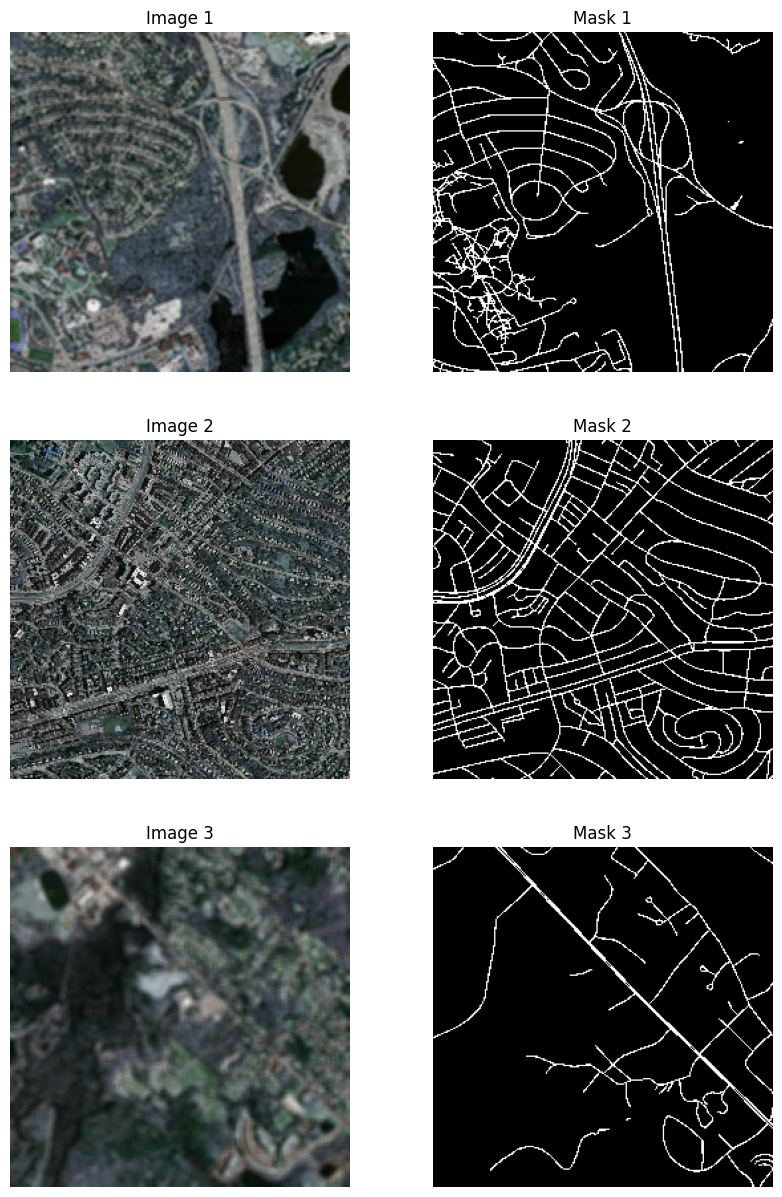

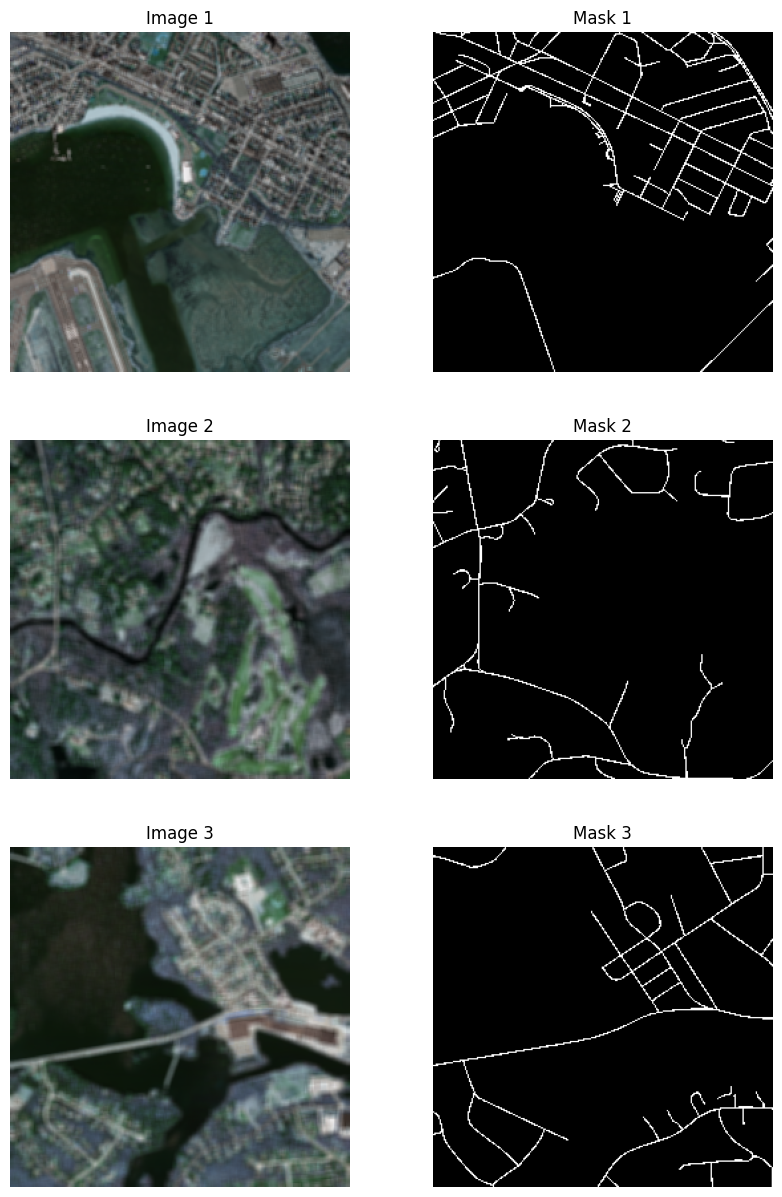

In [50]:
import matplotlib.pyplot as plt

# Function to display images and masks
def display_samples(img_batch, mask_batch, n_samples=3):
    fig, axes = plt.subplots(n_samples, 2, figsize=(10, 5 * n_samples))

    for i in range(n_samples):
        # Display the image
        axes[i, 0].imshow(img_batch[i])
        axes[i, 0].set_title(f"Image {i+1}")
        axes[i, 0].axis('off')

        # Display the mask
        axes[i, 1].imshow(mask_batch[i][:, :, 0], cmap='gray')  # Assuming mask is 1 channel
        axes[i, 1].set_title(f"Mask {i+1}")
        axes[i, 1].axis('off')

    plt.show()

# Display samples from the training dataset
display_samples(img, mask, n_samples=3)

# Display samples from the validation dataset
display_samples(val_img, val_mask, n_samples=3)

# Display samples from the test dataset
display_samples(test_img, test_mask, n_samples=3)


In [53]:
def numpy_iou(y_true, y_pred, n_class=2):
    y_true = y_true.numpy()  # Convert y_true to NumPy array
    y_pred = y_pred.numpy()
    def iou(y_true, y_pred, n_class):

        # IOU = TP/(TP+FN+FP)
        IOU = []
        for c in range(n_class):
            TP = np.sum((y_true == c) & (y_pred == c))
            FP = np.sum((y_true != c) & (y_pred == c))
            FN = np.sum((y_true == c) & (y_pred != c))

            n = TP
            d = float(TP + FP + FN + 1e-12)

            iou = np.divide(n, d)
            IOU.append(iou)

        return np.mean(IOU)

    batch = y_true.shape[0]
    y_true = np.reshape(y_true, (batch, -1))
    y_pred = np.reshape(y_pred, (batch, -1))

    score = []
    for idx in range(batch):
        iou_value = iou(y_true[idx], y_pred[idx], n_class)
        score.append(iou_value)
    return np.mean(score)

In [54]:
def numpy_mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.5):
        y_pred_ = tf.cast(y_pred > t, tf.int32)
        score = tf.numpy_function(numpy_iou, [y_true, y_pred_], tf.float64)
        prec.append(score)
    return K.mean(K.stack(prec), axis=0)

def tf_mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.5):
        y_pred_ = tf.cast(y_pred > t, tf.int32)
        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        prec.append(score)
    val = K.mean(K.stack(prec), axis=0)
    return [val, up_opt]

In [55]:
def dice_coe(y_true,y_pred, loss_type='jaccard', smooth=1.):

    y_true_f = tf.reshape(y_true,[-1])
    y_pred_f = tf.reshape(y_pred,[-1])

    intersection = tf.reduce_sum(y_true_f * y_pred_f)

    if loss_type == 'jaccard':
        union = tf.reduce_sum(tf.square(y_pred_f)) + tf.reduce_sum(tf.square(y_true_f))

    elif loss_type == 'sorensen':
        union = tf.reduce_sum(y_pred_f) + tf.reduce_sum(y_true_f)

    else:
        raise ValueError("Unknown `loss_type`: %s" % loss_type)

    return (2. * intersection + smooth) / (union + smooth)

def dice_loss(y_true,y_pred, loss_type='jaccard', smooth=1.):

    y_true_f = tf.cast(tf.reshape(y_true,[-1]),tf.float32)
    y_pred_f =tf.cast(tf.reshape(y_pred,[-1]),tf.float32)

    intersection = tf.reduce_sum(y_true_f * y_pred_f)

    if loss_type == 'jaccard':
        union = tf.reduce_sum(tf.square(y_pred_f)) + tf.reduce_sum(tf.square(y_true_f))

    elif loss_type == 'sorensen':
        union = tf.reduce_sum(y_pred_f) + tf.reduce_sum(y_true_f)

    else:
        raise ValueError("Unknown `loss_type`: %s" % loss_type)

    return (1-(2. * intersection + smooth) / (union + smooth))

In [56]:
def accuracy(y_true, y_pred):
    '''Calculates the mean accuracy rate across all predictions for binary
    classification problems.
    '''
    return K.mean(K.equal(y_true, K.round(y_pred)))


def weighted_BCE_loss(y_true, y_pred, positive_weight=5):
    # y_true: (None,None,None,None)     y_pred: (None,512,512,1)
    y_pred = K.clip(y_pred, min_value=1e-12, max_value=1 - 1e-12)
    weights = K.ones_like(y_pred)  # (None,512,512,1)
    weights = tf.where(y_pred < 0.5, positive_weight * weights, weights)
    # weights[y_pred<0.5]=positive_weight
    out = keras.losses.binary_crossentropy(y_true, y_pred)  # (None,512,512)
    out = K.expand_dims(out, axis=-1) * weights  # (None,512,512,1)* (None,512,512,1)
    return K.mean(out)

In [63]:

def convolution_block(x, filters, size, strides=(1,1), padding='same', activation=True):
    x = Conv2D(filters, size, strides=strides, padding=padding)(x)
    x = BatchNormalization()(x)
    if activation == True:
        x = LeakyReLU(alpha=0.1)(x)
    return x

def residual_block(blockInput, num_filters=16):
    x = LeakyReLU(alpha=0.1)(blockInput)
    x = BatchNormalization()(x)
    blockInput = BatchNormalization()(blockInput)
    x = convolution_block(x, num_filters, (3,3) )
    x = convolution_block(x, num_filters, (3,3), activation=False)
    x = Add()([x, blockInput])
    return x

In [85]:
from keras.layers import Dense, Dropout, Input, add, ZeroPadding2D, Conv2D, BatchNormalization, MaxPooling2D, Conv2DTranspose,Activation, Concatenate, Add,LeakyReLU,concatenate # Import Add layer here
from tensorflow import keras

In [121]:
def UEfficientNet(input_shape=(None, None, 3),dropout_rate=0.1):

    backbone = tf.keras.applications.EfficientNetB7(weights='imagenet',
                            include_top=False,
                            input_shape=input_shape)
    input = backbone.input
    start_neurons = 8

    conv4 = backbone.layers[342].output
    conv4 = LeakyReLU(alpha=0.1)(conv4)

    # Store the original conv4 output for later use
    original_conv4_output = conv4

    if len(conv4.shape) == 2:
        conv4 = tf.keras.layers.Reshape((conv4.shape[1], 1, 1))(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)
    pool4 = Dropout(dropout_rate)(pool4)

     # Middle
    convm = Conv2D(start_neurons * 32, (3, 3), activation=None, padding="same")(pool4)
    convm = residual_block(convm,start_neurons * 32)
    convm = residual_block(convm,start_neurons * 32)
    convm = LeakyReLU(alpha=0.1)(convm)

    deconv4 = Conv2DTranspose(start_neurons * 16, (3, 3), strides=(2, 2), padding="same")(convm)

    # Instead of using tf.shape directly, get the shape from the Keras tensor
    deconv4_shape = deconv4.shape

    original_conv4_output_shape = original_conv4_output.shape

    # Calculate the size for UpSampling2D using the shapes
    size = (tf.cast(deconv4_shape[1] / original_conv4_output_shape[1], tf.int32),
            tf.cast(deconv4_shape[2] / original_conv4_output_shape[2], tf.int32))

    original_conv4_output = tf.keras.layers.UpSampling2D(size=size)(original_conv4_output)

    uconv4 = concatenate([deconv4, original_conv4_output])

    uconv4 = Dropout(dropout_rate)(uconv4)

    uconv4 = Conv2D(start_neurons * 16, (3, 3), activation=None, padding="same")(uconv4)
    uconv4 = residual_block(uconv4,start_neurons * 16)
    uconv4 = LeakyReLU(alpha=0.1)(uconv4)  #conv1_2

    deconv3 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(uconv4)
    deconv3_up1 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(deconv3)
    deconv3_up2 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(deconv3_up1)
    conv3 = backbone.layers[154].output
    uconv3 = concatenate([deconv3, conv3])
    uconv3 = Dropout(dropout_rate)(uconv3)

    uconv3 = Conv2D(start_neurons * 8, (3, 3), activation=None, padding="same")(uconv3)
    uconv3 = residual_block(uconv3,start_neurons * 8)
    uconv3 = LeakyReLU(alpha=0.1)(uconv3)

    deconv2 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(uconv3)
    conv2 = backbone.layers[92].output
    uconv2 = concatenate([deconv2, conv2])

    uconv2 = Dropout(0.1)(uconv2)
    uconv2 = Conv2D(start_neurons * 4, (3, 3), activation=None, padding="same")(uconv2)
    uconv2 = residual_block(uconv2,start_neurons * 4)
    uconv2 = LeakyReLU(alpha=0.1)(uconv2)

    deconv1 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv2)
    conv1 = backbone.layers[30].output
    uconv1 = concatenate([deconv1, conv1])

    uconv1 = Dropout(0.1)(uconv1)
    uconv1 = Conv2D(start_neurons * 2, (3, 3), activation=None, padding="same")(uconv1)
    uconv1 = residual_block(uconv1,start_neurons * 2)
    uconv1 = LeakyReLU(alpha=0.1)(uconv1)

    uconv0 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv1)
    uconv0 = Dropout(0.1)(uconv0)
    uconv0 = Conv2D(start_neurons * 1, (3, 3), activation=None, padding="same")(uconv0)
    uconv0 = residual_block(uconv0,start_neurons * 1)
    uconv0 = LeakyReLU(alpha=0.1)(uconv0)

    uconv0 = Dropout(dropout_rate/2)(uconv0)
    output_layer = Conv2D(1, (1,1), padding="same", activation="sigmoid")(uconv0)

    model = Model(input, output_layer)
    model.name = 'Eff-B7'

    return model

In [123]:
from tensorflow.keras.optimizers import Adam

# Initialize the model
model = UEfficientNet(input_shape=(512, 512, 3), dropout_rate=0.1)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',  # Binary segmentation loss
              metrics=['accuracy'])


IndexError: tuple index out of range

In [75]:
K.clear_session()
img_size = 256
model = UEfficientNet()
# model = tf.keras.applications.EfficientNetB7(input_shape=(img_size,img_size,3),include_top=False) # This line was missing

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


ValueError: Input 0 of layer "max_pooling2d" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 960)

In [61]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=weighted_BCE_loss, optimizer=adam, metrics=[accuracy,dice_coe, numpy_mean_iou])


filepath="eff7_resdual.h5"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_accuracy',save_best_only=True, mode='max',verbose=1)
callbacks_list = [checkpoint]




In [62]:
hist=model.fit(
    train_dataset,

    validation_data=val_dataset,
    callbacks = callbacks_list,

    epochs = 200
)

Epoch 1/200


ValueError: as_list() is not defined on an unknown TensorShape.